<a href="https://colab.research.google.com/github/elenagonzalezrebollo/AprendizajeAutomatico/blob/main/Copia_de_Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EJERCICIO 2

Marina Garrido 

Javier Arteaga 

Guillermo Marmol

Elena González 


## Importar librerias

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# Cargar base de datos
data = pd.read_csv('banco ufv.csv', encoding='latin-1', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [46]:
data.isnull().values.any() 

False

In [47]:
# Hay valores atípicos
#np.unique(arr, return_counts=True)

In [48]:
data=data.drop(['job','marital','default','housing','loan','contact','day','month','campaign','pdays','previous','poutcome','y'], axis=1)
data.head()
# Nos quedamos con: age (años), education (educación), balance (saldo) y duration (días como cliente)

,age,education,balance,duration
0,58,tertiary,2143,261
1,44,secondary,29,151
2,33,secondary,2,76
3,47,unknown,1506,92
4,33,unknown,1,198


In [49]:
# Columnas con las que nos hemos quedado 
data.columns

Index(['age', 'education', 'balance', 'duration'], dtype='object')

In [50]:
# Pasamos la variable education de categórica a numérica
education_new=pd.get_dummies(data["education"])
education_new

,primary,secondary,tertiary,unknown
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
45206,0,0,1,0
45207,1,0,0,0
45208,0,1,0,0
45209,0,1,0,0


In [51]:
data.drop(['education'], axis=1)

,age,balance,duration
0,58,2143,261
1,44,29,151
2,33,2,76
3,47,1506,92
4,33,1,198
...,...,...,...
45206,51,825,977
45207,71,1729,456
45208,72,5715,1127
45209,57,668,508


In [52]:
data = pd.concat([data, education_new], axis=1)
data

,age,education,balance,duration,primary,secondary,tertiary,unknown
0,58,tertiary,2143,261,0,0,1,0
1,44,secondary,29,151,0,1,0,0
2,33,secondary,2,76,0,1,0,0
3,47,unknown,1506,92,0,0,0,1
4,33,unknown,1,198,0,0,0,1
...,...,...,...,...,...,...,...,...
45206,51,tertiary,825,977,0,0,1,0
45207,71,primary,1729,456,1,0,0,0
45208,72,secondary,5715,1127,0,1,0,0
45209,57,secondary,668,508,0,1,0,0


In [53]:
¿education con balance?

Object `balance` not found.


Para ello estableceremos 3 rangos numéricos: los que tienen deudas, la gente que tiene 
unos ahorros normales (en positivo, pero menos de 10.000 euros) y los que disponen de suficientes ahorros 
como para ofrecerles paquetes de inversión (aquellos en positivo con más de 10.000 euros). 

In [54]:
Deuda = data['balance'].apply(lambda val: val  <0 )
Ahorros = data['balance'].apply(lambda val: (val>=0)) & data['balance'].apply(lambda val: (val<=10000 ))
Paquetes_De_Inversión = data['balance'].apply(lambda val: val >10000)

Num_Deuda=sum(bool(x) for x in Deuda)
Num_Ahorros=sum(bool(x) for x in Ahorros)  
Num_Paquetes_De_Inversión=sum(bool(x) for x in Paquetes_De_Inversión)

Num_Total=len(data['balance'])

porc_Num_Deuda=Num_Deuda/Num_Total
porc_Num_Ahorros=Num_Ahorros/Num_Total
porc_Num_Paquetes_De_Inversión=Num_Paquetes_De_Inversión/Num_Total

print("El numero de personas con deudas es de: ", Num_Deuda , " -->" ,porc_Num_Deuda, "%")
print("El numero de personas con ahorros es de: ", Num_Ahorros , " -->" ,porc_Num_Ahorros, "%")
print("El numero de personas con paquetes de inversión es de: ", Num_Paquetes_De_Inversión, " -->", porc_Num_Paquetes_De_Inversión, "%")

El numero de personas con deudas es de:  3766  --> 0.08329831235761209 %
El numero de personas con ahorros es de:  40616  --> 0.8983654420384419 %
El numero de personas con paquetes de inversión es de:  829  --> 0.018336245603945943 %


Imprimimos los sueldos

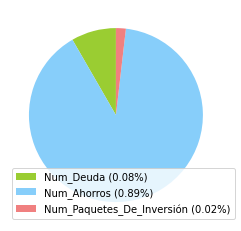

In [55]:
import matplotlib.pyplot as plt
import numpy as np


labels= ["Num_Deuda (0.08%)", "Num_Ahorros (0.89%)", "Num_Paquetes_De_Inversión (0.02%)"]
colors = ['yellowgreen', 'lightskyblue', 'lightcoral']
sizes = [porc_Num_Deuda,porc_Num_Ahorros,porc_Num_Paquetes_De_Inversión]


patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.show() 


Hacer una transformación:
Alumnos hasta  30  años.  Trabajadores  jóvenes 
  30  a 45  años,  trabajadores  veteranos de  46  a 65  y el  resto  serán  clientes  no 
vinculados a la Universidad. Obten un gráfico donde podamos ver como se distribuye cada clase. Interpreta 
los datos. 

In [62]:
Alumnos = data['age'].apply(lambda val: val  <30 )
Trabajadores_Jóvenes = data['age'].apply(lambda val: (val>=30)) & data['age'].apply(lambda val: (val<=45))
Trabajadores_Veteranos = data['age'].apply(lambda val: (val>45)) & data['age'].apply(lambda val: (val<=65))
Jubilados= data['age'].apply(lambda val: val >65)

Num_Alumnos=sum(bool(x) for x in Alumnos)
Num_Trabajadores_Jóvenes=sum(bool(x) for x in Trabajadores_Jóvenes)  
Num_Trabajadores_Veteranos=sum(bool(x) for x in Trabajadores_Veteranos)
Num_Jubilados=sum(bool(x) for x in Jubilados)


Num_Total=len(data['age'])

porc_Num_Alumnos=Num_Alumnos/Num_Total
poc_Num_Trabajadores_Jóvenes=Num_Trabajadores_Jóvenes/Num_Total
porc_Num_Trabajadores_Veteranos=Num_Trabajadores_Veteranos/Num_Total
porc_Num_Jubilados=Num_Jubilados/Num_Total

print("El numero de personas con deudas es de: ", Num_Alumnos, " -->" ,porc_Num_Alumnos, "%")
print("El numero de personas con ahorros es de: ", Num_Trabajadores_Jóvenes, " -->" ,poc_Num_Trabajadores_Jóvenes, "%")
print("El numero de personas con paquetes de inversión es de: ", Num_Trabajadores_Veteranos, " -->" ,porc_Num_Trabajadores_Veteranos, "%")
print("El numero de personas con paquetes de inversión es de: ", Num_Jubilados, " -->" ,porc_Num_Jubilados, "%")



El numero de personas con deudas es de:  5273  --> 0.11663090840724602 %
El numero de personas con ahorros es de:  25490  --> 0.5638008449271195 %
El numero de personas con paquetes de inversión es de:  13697  --> 0.3029572449182721 %
El numero de personas con paquetes de inversión es de:  751  --> 0.016611001747362367 %


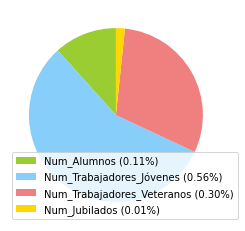

In [64]:
labels= ["Num_Alumnos (0.11%)", "Num_Trabajadores_Jóvenes (0.56%)", "Num_Trabajadores_Veteranos (0.30%)", "Num_Jubilados (0.01%)"]
colors = ['yellowgreen', 'lightskyblue', 'lightcoral','gold']
sizes = [Num_Alumnos, Num_Trabajadores_Jóvenes, Num_Trabajadores_Veteranos, Num_Jubilados]
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.show() 

Pasamos el tiempo que llevan los clientes de esta empresa de días a años

In [59]:
data.duration=data.duration/365
data

,age,education,balance,duration,primary,secondary,tertiary,unknown
0,58,tertiary,2143,0.715068,0,0,1,0
1,44,secondary,29,0.413699,0,1,0,0
2,33,secondary,2,0.208219,0,1,0,0
3,47,unknown,1506,0.252055,0,0,0,1
4,33,unknown,1,0.542466,0,0,0,1
...,...,...,...,...,...,...,...,...
45206,51,tertiary,825,2.676712,0,0,1,0
45207,71,primary,1729,1.249315,1,0,0,0
45208,72,secondary,5715,3.087671,0,1,0,0
45209,57,secondary,668,1.391781,0,1,0,0


In [60]:
# Distribución de frecuencia.
# 1ro creamos un rango para las categorías.

particiones = np.arange(0, 7, 0.5)

# Luego cortamos los datos en cada contenedor 
frec = pd.cut(data['duration'], particiones)

# Por último hacemos el recuento de los contenedores
# Para armar la tabla de frecuencia.
tabla_frec = pd.value_counts(frec)
tabla_frec


(0.0, 0.5]    22892
(0.5, 1.0]    13181
(1.0, 1.5]     4613
(1.5, 2.0]     2116
(2.0, 2.5]     1044
(2.5, 3.0]      571
(3.0, 3.5]      351
(3.5, 4.0]      180
(4.0, 4.5]      109
(4.5, 5.0]       54
(5.0, 5.5]       38
(5.5, 6.0]       19
(6.0, 6.5]       10
Name: duration, dtype: int64

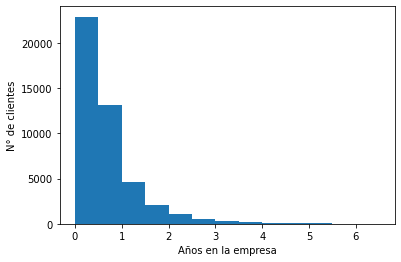

In [61]:
particiones = np.arange(0, 7, 0.5)
plt.hist(data['duration'], particiones)
plt.xlabel("Años en la empresa")
plt.ylabel("N° de clientes")
plt.show()